# 2. Método de Halley

El método de Halley es funcional para encontrar raices de funciones no lineales. este es un algoritmo para encontrar un cero de una función utilizada cuando la funcion sea de variable real posible de derivar 2 veces, siendo su segunda derivada continua. tambien podemos considerar que este método solo es una generalizacón del método de newton, con convergencia cúbica.

### Deducción del método

Como lo hemos presentado con anterioridad este método viene generalizado por el método de newton asi que partiremos con su aplicación a la función.

$$g = \frac{f}{\sqrt{f'}}$$
asi es que $$x_{n+1} = x_{n} \frac{g(x)}{\sqrt{g'(x)}}$$
con $$g'(x) = \frac{2[f'(x)]^2 - f(x)f''(x)}{\sqrt{2f'(x)\sqrt{f'(x)}}}$$


y dado esto es que se estima que sí $f'(c) = 0$ se aplicara solo si g puede extenderse a c.

presentamos la ecuación general de Halley para el desarrollo de todo nuestro trabajo:

$$x_{n+1} = x_{n} -\frac{2f(x_{n})f'(x_{n})}{2f'(x_{n})^2-f(x_{n})f''(x_{n})}$$

<font color="green"> Ahora bien para comprender el método nos ayudaremos del siguiente ejemplo práctico.</font>

### Ejemplo Practico 1 
Encontrar mediante el método de Halley la raiz de la función $f(x)=1/2-cos(x)$ con una tolerancia de $1x10^-9$ para el error absoluto, tal que $x \in [0,\pi]$ definimos la función y el intervalo inicial.

In [1]:
# importar todas las funciones de pylab
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt

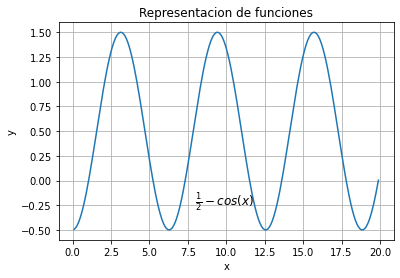

In [48]:
from math import *
from numpy import *

t = arange(0.1, 20, 0.1)

y1 = 1/2-cos(t)
p1 = plot(t, y1)

# Texto en la gráfica en coordenadas (x,y)
texto1 = text(8, -0.25, r'$\frac{1}{2}-cos(x)$', fontsize=12)
# Añado una malla al gráfico
grid()

title('Representacion de funciones')
xlabel('x')
ylabel('y')
show()

## 2.2. Logaritmo del método de Halley
A continuación presentaremos el logaritmo o codigo del método de Halley para luego continuar a sacar su convergencia y otras definiciones para concluir con dicho método.

haremos uso de la formula general de Halley:

$$x_{n+1} = x_{n} -\frac{2f(x_{n})f'(x_{n})}{2f'(x_{n})^2-f(x_{n})f''(x_{n})}$$

Ahora bien importemos la librerias que no serviran para el desarrollo de nuestro algoritmo

In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tabulate import tabulate

In [5]:
import math
from math import exp, sqrt, sin, cos, pi

Definamos nuestra función con su primera y segunda derivada

In [6]:
#función del ejercicio 
def f(t):
    return 1/2-cos(t)

#primera derivada de la función

def df(t):
    return sin(t)

#segunda derivada de la función

def d2f(t):
    return cos(t)

In [7]:
f(0)

-0.5

In [8]:
f(pi)

1.5

In [9]:
f(pi/2)

0.49999999999999994

Definamos variables donde:
- __iter:__ numero de iteraciones maximas
- __tol:__ tolerancia 
- __p0:__ valor inicial
- __listahalley:__ lista para representar el numero de iteraciones

para __iter__ y __p0__ haremos uso de nuestro intervalo de $[0,\pi]$

In [10]:
iter=pi
tol=10**(-9)
p0=0
listahalley=[]

Presentando el logaritmo de halley - para la realizaión del ejercicio anterior nos basaremos en presentar sus valores por medio de tabulaciones.

In [11]:
#logaritmo de halley
def halley(f,p0):                         #definiendo la función halley
    p=p0                                 #sobredefiniendo p0
    lista=[]                             #definiendo lista simple
    pp="-"                              
    error="-"
    for i in [*range(0, int(float(iter)))]:   #ciclo for para tomar encuenta el intervalo [0,pi]
        lista.append([i,p,f(p),df(p),error]) 
        listahalley.append(p)
        pp=p
        p=p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p) #formula de halley
        errorA=abs(p-pp)                        #encontrar el error de halley
        if p!=0:                                #iteraciones hasta encontrar 0
            errorB=abs(p-pp)/p
        errorC=abs(f(p))
        error=errorA
        if error<tol:                          #parar hasta que error sea menor que la tolerancia
            break                                 
    print(tabulate(lista,headers=["n","pn","f(pn)","f'(pn)","error"])) #imprimiendo resultados en tabulaciones
    return p

Ya teniendo el logaritmo de Halley procederemos a llamar la función para presentar los valores en tabulaciones. 
<font color="green"> para ello solo necesitaremos la respectiva función halley con f = funcion y 0 = el valor inicial x0</font>

In [12]:
halley(f,0)

  n        pn      f(pn)    f'(pn)  error
---  --------  ---------  --------  ------------------
  0  0         -0.5       0         -
  1  0.5       -0.377583  0.479426  0.5
  2  0.872968  -0.142555  0.766239  0.3729677361865782


1.0286997633054566

## 2.3. Analisis de convergencia 
como lo hemos demostrado en el trabajo anterior el método de halley converge con un orden cúbico, por lo que podemos decir que si lo comparamos con el método de newton que es su generalización, va a converger mas ligero siendo más eficiente ya que el método de newton tiende a converger a un orden cuadratico.

por tanto vamos a derivar la formula 1 de halley para encontrar su analisis de convergencia y tambien haremos lo mismo con el de newton para verificar que halley converge más rapido

al derivar la ecuación 1 de halley tenemos:
$$g'(x)=\frac{d}{dx}(1-\frac{2f'(x_{n})^22f'(x_{n})^2}{(2(f'(x_{n}))^2)^2}$$

Analisis de convergencia para método de halley

In [13]:
def g(t):
    return abs(1-(2*f(t)**2*2*df(t)**2)/(2*(df(t))**2)**2)

In [14]:
g(-0.5), g(0.49), g(1.5)

(0.3797289267985642, 0.34001871334141687, 0.8148067891242188)

Analisis de convergencia para método de newton


In [15]:
def g(t):
    return abs((f(t)*d2f(t))/df(t)**2)

In [16]:
g(-0.5), g(0.49), g(1.5)

(1.4416425238532342, 1.523079071475961, 0.03051755138368333)

Procederemos a graficar para ver su tendencia.

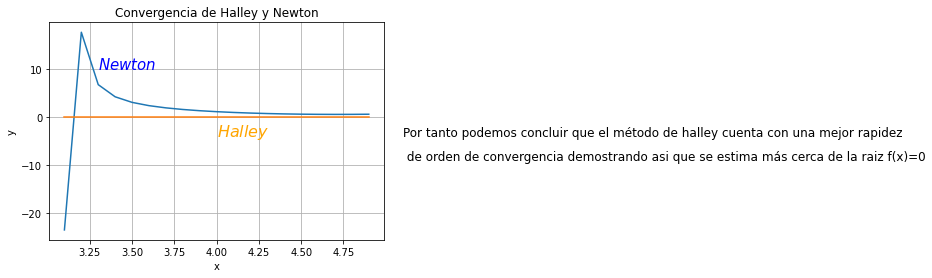

In [17]:
from math import *
from numpy import *

t = arange(3.1, 5, 0.1)

y1 = 1/2-cos(t)*cos(t)/sin(t)                                       #formula derivada de newton
y2 = 1-(2*sin(t)**2*2*sin(t)**2)/(2*sin(t)**2)**2                   #formula derivada de halley
p1, p2 = plot(t, y1, t, y2)

# Texto en la gráfica en coordenadas (x,y)
texto1 = text(3.3, 10, r'$Newton$', fontsize=15, color='b')
texto2 = text(4, -4, r'$Halley$', fontsize=16, color='orange')
texto3 = text(5.1, -4, r'Por tanto podemos concluir que el método de halley cuenta con una mejor rapidez ', fontsize=12)
texto4 = text(5.1, -9, r' de orden de convergencia demostrando asi que se estima más cerca de la raiz f(x)=0', fontsize=12)

# Añado una malla al gráfico
grid()

title('Convergencia de Halley y Newton')
xlabel('x')
ylabel('y')
show()

## 2.4. Analisis del error de Halley
como cualquier otro método es importante hacer un bosqueo de los errores cometidos al fin de poder estimar un mejor valor, entonces continuaremos a evaluar el error del método de halley.

Continuamos a poner las librerias a usar.

In [18]:
from __future__ import division

Primer punto comenzaremos a evaluar el error de forma general y así mismo vamos a ver la tendencia del error en una grafica lineal.

Importemos las librerias a utilizar.

In [19]:
%matplotlib inline
from numpy import linspace
import matplotlib.pyplot as plt
import math
from math import exp, sqrt, sin, cos, pi
from matplotlib import pyplot as plt
import numpy as np

In [20]:
#logaritmo para encontrar el error
lista=[]
p0=0
p=p0
for i in [*range(0, int(float(pi)))]:                       #ciclo for para tomar encuenta el intervalo [0,pi]
        p = p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p)           #formula general de halley
        lista.append(p)
        print (p)

0.5
0.8729677361865782
1.0286997633054566


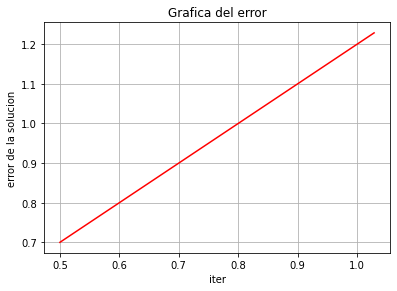

In [21]:
#Graficando el error del método
error=[]
for i in [*range(0, int(float(pi)))]:
    error.append(lista[i]-(-.2))
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8, 0.8])

axes.plot(lista ,error, 'r')
axes.set_xlabel('iter')
axes.set_ylabel('error de la solucion')
axes.set_title('Grafica del error')
axes.grid('on')

### Analisis del error del ejercicio practico 1
A contiuación presentaremos un analisis del error más detallado mejorando dicho error aproximandolo y asi lograremos ver si el resultado esta dentro del nivel aceptable 

definimos las variables a utilizar, donde:
- iter : numero de iteraciones maximas
- p0: valor inicial

In [22]:
iter=pi
p0=0
listahalley=[]

In [23]:
#logaritmo para encontrar error de halley
def error(f,p0):
    lista=[]
    p0=0
    p=p0
    for i in [*range(0, int(float(iter)))]:
        p = p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p)
        lista.append(p)
    print (p)

In [24]:
error(f,0)

1.0286997633054566


Ahora continuaremos a sacar los tipos de error que el método de halley puede presentar:
Como tenemos un proceso iterativo el error esta normalizado a un valor aproximado por tanto el error relativo porcentual $\xi_{a}$ se define así:

$$\xi_{a}= \frac{error aproximado*valor aproximado}{valor aproximado}*100%$$

llamando al error aproximado y valor aproximado

In [25]:
error(f,0) #error aproximado

1.0286997633054566


In [26]:
halley(f,0) #valor aproximado

  n        pn      f(pn)    f'(pn)  error
---  --------  ---------  --------  ------------------
  0  0         -0.5       0         -
  1  0.5       -0.377583  0.479426  0.5
  2  0.872968  -0.142555  0.766239  0.3729677361865782


1.0286997633054566

In [27]:
#definamos variables
erroraprox=1.0286997633054566
valoraprox=1.0286997633054566
f=g

g=abs((erroraprox-valoraprox/valoraprox)*1)
print("el error porcentual es:", g)


el error porcentual es: 0.02869976330545665


Ahora bien, nos importa que el valor absoluto porcentual sea menor que una tolerancia porcentual prefijada, la cual la definimos así:

$$|\xi_{a}|<\xi_{s}$$

si se cumple esta relación, entonces se considera que el resultado obtenido esta dentro del nivel aceptable fijado previamente.


In [28]:
#definamos la relación
Ea=0.02869976330545665
Es=10**(-9)

if Ea <= Es:
    print("EL valor adsoluto porcentual es mayor")
else:
    print("EL valor adsoluto porcentual es menor")
    

EL valor adsoluto porcentual es menor


<font color="green">Por tanto el resultado obtenido esta dentro del nivel aceptable, concluyendo así que el método nos permite aproximar el error.</font>

## 2.5. Analisis de Eficiencia
Para sacar la eficiecia para un método $p>1$ en el que cada iteración necesita r evaluaciones de dicha funcion o derivadas se considera la siguiente formula
$$\xi(p,r) = p^{1/r}$$

tambien podemos considerar que cuando mayor sea la eficiencia de un método, mejor es el método. asi mismo cuando este mas cerca $X_{o}$ de la raiz, mayor sera la eficiencia del método. Por lo tanto la eficiencia y la convergencia estan relacionadas entre si, sabemos que halley tiene un orden convergencia cúbico por tanto:
$$\xi(3,3) = 3^{1/3}\succeq 1.4422$$

In [29]:
#codificando formula de eficiencia de halley
x=3
y=3
p=3
g=p**(1/y)
print("Eficiencia del método:",g)

Eficiencia del método: 1.4422495703074083


## 2.6 Implementación para funciones irracionales

Ya probamos el método de halley para funciones racionales, ahora probemos este método para funciones irracionales para este desarrollo tomaremos en cuenta el siguiente ejercicio practico.

### Ejemplo practico 2
Encontrar mediante el método de Halley la raiz de la función $f(x)=x+\sqrt{x^2+1}$ con una tolerancia de $1x10^-9$ para el error absoluto, tal que $x \in [0,5]$ definimos la función y el intervalo inicial.

In [30]:
# importar todas las funciones de pylab
from pylab import *
# importar el módulo pyplot
import matplotlib.pyplot as plt
import math
from math import exp, sqrt, sin, cos, pi

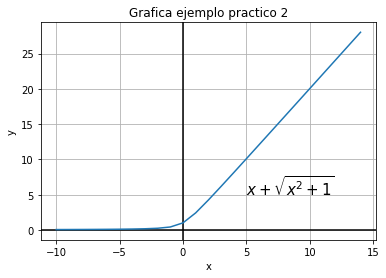

In [31]:
from math import *
from numpy import *
from matplotlib import pyplot
t = arange(-10, 15)
# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
y1 = t + sqrt(t**2+1)
p1 = plot(t, y1)

# Texto en la gráfica en coordenadas (x,y)
texto1 = text(5, 5, r'$x+\sqrt{x^2+1}$', fontsize=15)
# Añado una malla al gráfico
grid()

title('Grafica ejemplo practico 2')
xlabel('x')
ylabel('y')
show()

Definamos nuestra función, primera y segunda derivada.

In [32]:
#función del ejercicio 
def f(t):
    return t + sqrt(t**2+1)

#primera derivada de la función

def df(t):
    return 1+t/sqrt(t**2+1)

#segunda derivada de la función

def d2f(t):
    return 1/(t**2+1)**1.5

In [33]:
f(0), f(1), f(2), f(3), f(4), f(5)

(1.0,
 2.414213562373095,
 4.23606797749979,
 6.16227766016838,
 8.123105625617661,
 10.099019513592784)

Definamos variables donde:
- __iter:__ numero de iteraciones maximas
- __tol:__ tolerancia 
- __p0:__ valor inicial
- __listahalley:__ lista para representar el numero de iteraciones

para __iter__ y __p0__ haremos uso de nuestro intervalo de $[0,5]$

In [34]:
iter=5
tol=10**(-9)
p0=0
listahalley=[]

Presentando el logaritmo de halley - para la realizaión del ejercicio anterior presentaremos sus valores por medio de tabulaciones.

In [35]:
#logaritmo de halley
def halley(f,p0):                         #definiendo la función halley
    p=p0                                 #sobredefiniendo p0
    lista=[]                             #definiendo lista simple
    pp="-"                              
    error="-"
    for i in [*range(0, int(float(iter)))]:   #ciclo for para tomar encuenta el intervalo [0,pi]
        lista.append([i,p,f(p),df(p),error]) 
        listahalley.append(p)
        pp=p
        p=p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p) #formula de halley
        errorA=abs(p-pp)                        #encontrar el error de halley
        if p!=0:                                #iteraciones hasta encontrar 0
            errorB=abs(p-pp)/p
        errorC=abs(f(p))
        error=errorA
        if error<tol:                          #parar hasta que error sea menor que la tolerancia
            break                                 
    print(tabulate(lista,headers=["n","pn","f(pn)","f'(pn)","error"])) #imprimiendo resultados en tabulaciones
    return abs(p)

Ya teniendo el logaritmo de Halley procederemos a llamar la función para presentar los valores en tabulaciones. 
<font color="green"> para ello solo necesitaremos la respectiva función halley con f = funcion y 0 = el valor inicial x0</font>

In [36]:
halley(f,0)

  n        pn     f(pn)    f'(pn)  error
---  --------  --------  --------  --------------------
  0   0        1         1         -
  1  -2        0.236068  0.105573  2.0
  2  -2.02139  0.23383   0.103684  0.021392336898662823
  3  -2.04204  0.231708  0.101906  0.020646629018318485
  4  -2.062    0.229691  0.100228  0.019956451384381513


2.0813110572548426

### Calculando el error del ejercicio anterior

In [37]:
iter=5
p0=0
listahalley=[]

In [38]:
#logaritmo para encontrar error de halley
def error(f,p0):
    lista=[]
    p0=0
    p=p0
    for i in [*range(0, int(float(iter)))]:
        p = p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p)
        lista.append(p)
    print (abs(p))

In [39]:
error(f,0)

2.0813110572548426


Calculando el error relativo porcentual $\xi_{a}$ se define así:

$$\xi_{a}= \frac{error aproximado*valor aproximado}{valor aproximado}*100%$$

llamando al error aproximado y valor aproximado

In [40]:
error(f,0) #error aproximado

2.0813110572548426


In [41]:
halley(f,0) #valor aproximado

  n        pn     f(pn)    f'(pn)  error
---  --------  --------  --------  --------------------
  0   0        1         1         -
  1  -2        0.236068  0.105573  2.0
  2  -2.02139  0.23383   0.103684  0.021392336898662823
  3  -2.04204  0.231708  0.101906  0.020646629018318485
  4  -2.062    0.229691  0.100228  0.019956451384381513


2.0813110572548426

In [42]:
#definamos variables
erroraprox=2.0813110572548426
valoraprox=2.0813110572548426
f=g
g=abs((erroraprox-valoraprox/valoraprox)*1)
print("el error porcentual es:", g)
#definamos la relación
Ea=g
Es=10**(-9)
if Ea <= Es:
    print("EL valor adsoluto porcentual es mayor")
else:
    print("EL valor adsoluto porcentual es menor")

el error porcentual es: 1.0813110572548426
EL valor adsoluto porcentual es menor


Deduciendo que el error para este ejemplo esta dentro del nivel aceptable